---
# **Plane Price Prediction**

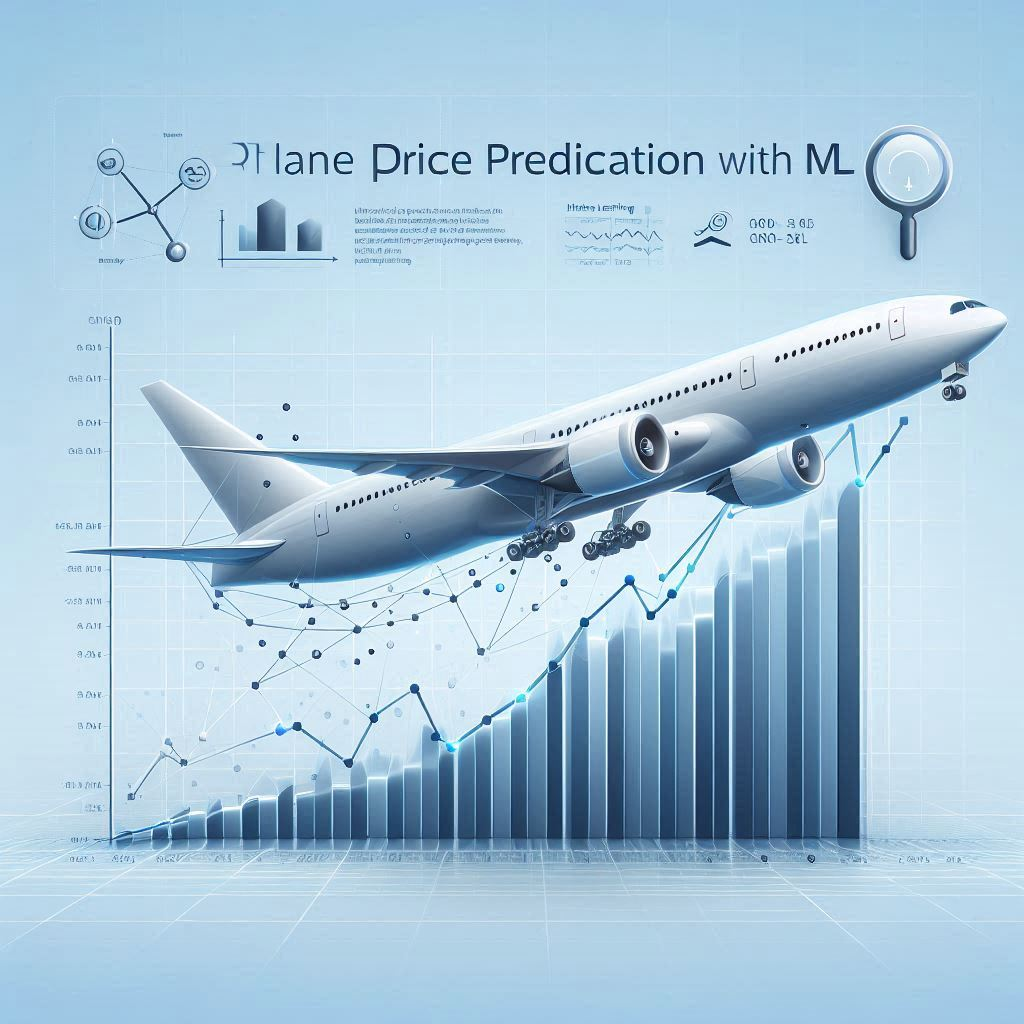

---
#### **objective of this analysis:**
1. **understanding key factors that unfluences a plane price**
2. **analysing price sensibilty to the plane features**
3. **building a ML model for predicting the price of a plane**
---

#### **Project workflow:**
1. **importing libraries**
1. **data cleaning and preprocessing**
2. **EDA and hypothesis making**
3. **data preparation for ML model ( scaling , standardisation,encoding )**
4. **model building(training,testing)**
5. **model evaluation and hyperparams tuning**
---

1. **importing libraries**

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

2. **data cleaning and preprocessing**

In [3]:
df = pd.read_csv("/kaggle/input/plane-price-prediction/Plane Price.csv")
df.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


<Axes: >

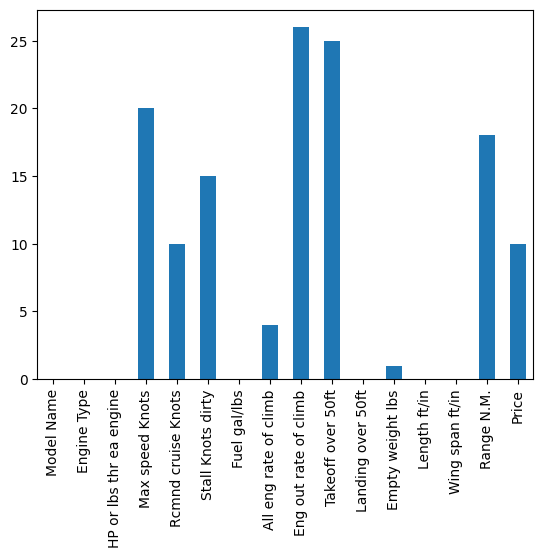

In [41]:
df.isnull().sum().plot(kind='bar')

<Axes: >

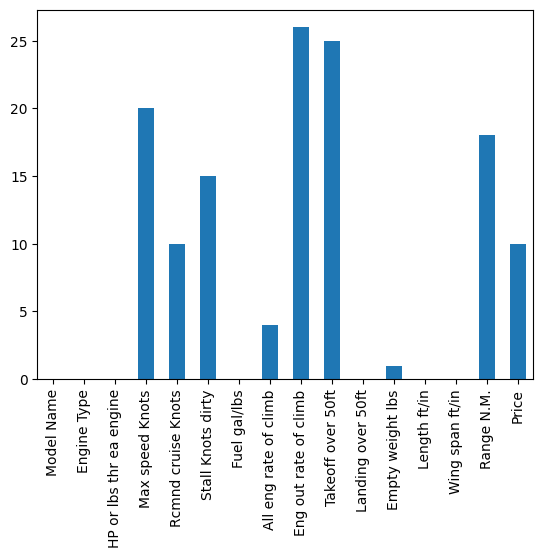

In [42]:
df.isna().sum().plot(kind='bar')

In [43]:
df.dropna(axis=0,inplace=True)

In [44]:
df.dtypes

Model Name                  object
Engine Type                 object
HP or lbs thr ea engine     object
Max speed Knots             object
Rcmnd cruise Knots         float64
Stall Knots dirty          float64
Fuel gal/lbs                 int64
All eng rate of climb       object
Eng out rate of climb      float64
Takeoff over 50ft          float64
Landing over 50ft           object
Empty weight lbs            object
Length ft/in                object
Wing span ft/in             object
Range N.M.                  object
Price                      float64
dtype: object

In [45]:
df.columns[2:]

Index(['HP or lbs thr ea engine', 'Max speed Knots', 'Rcmnd cruise Knots',
       'Stall Knots dirty', 'Fuel gal/lbs', 'All eng rate of climb',
       'Eng out rate of climb', 'Takeoff over 50ft', 'Landing over 50ft',
       'Empty weight lbs', 'Length ft/in', 'Wing span ft/in', 'Range N.M.',
       'Price'],
      dtype='object')

In [46]:
for col in df.columns[2:]:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '').str.strip()

In [47]:
df.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,2050,1180,25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,1350,820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,1300,810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,1300,800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,1220,740,21/5,35/0,175,1250000.0


In [48]:
def ft_to_inch(x):
    try:
        ft,inch = x.split('/')
        ft = int(ft)
        inch = int(inch)
        return (ft*12)+inch
    except:
        np.nan    

In [49]:
for col in [ 'Length ft/in', 'Wing span ft/in']:
    df[col] = df[col].apply(ft_to_inch)
df.head()    

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,2050,1180,303,449,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,1350,820,247,433,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,1300,810,257,420,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,1300,800,257,420,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,1220,740,257,420,175,1250000.0


In [50]:
df['Engine Type'].unique()

array(['Piston', 'Propjet', 'Jet', 'piston'], dtype=object)

In [51]:
df['Engine Type'] = df['Engine Type'].str.lower()

In [52]:
import re
for col in df.columns[2:]:
    if df[col].dtype == 'object':
        df[col] = df[col].str.extract(r'(\d+)')

In [53]:
for col in df.columns[2:]:
    if df[col].dtype == 'object':
        df[col]=df[col].astype(float)


In [54]:
df.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),piston,145.0,104.0,91.0,46.0,36,450.0,900.0,1300.0,2050.0,1180.0,303,449,370.0,1300000.0
1,7 CCM Champ,piston,85.0,89.0,83.0,44.0,15,600.0,720.0,800.0,1350.0,820.0,247,433,190.0,1230000.0
2,100 Darter (S.L. Industries),piston,90.0,90.0,78.0,37.0,19,650.0,475.0,850.0,1300.0,810.0,257,420,210.0,1600000.0
3,7 AC Champ,piston,85.0,88.0,78.0,37.0,19,620.0,500.0,850.0,1300.0,800.0,257,420,210.0,1300000.0
4,100 Darter (S.L. Industries),piston,65.0,83.0,74.0,33.0,14,370.0,632.0,885.0,1220.0,740.0,257,420,175.0,1250000.0


In [55]:
df.drop(df.columns[0],axis=1,inplace=True)

In [56]:
df.dtypes

Engine Type                 object
HP or lbs thr ea engine    float64
Max speed Knots            float64
Rcmnd cruise Knots         float64
Stall Knots dirty          float64
Fuel gal/lbs                 int64
All eng rate of climb      float64
Eng out rate of climb      float64
Takeoff over 50ft          float64
Landing over 50ft          float64
Empty weight lbs           float64
Length ft/in                 int64
Wing span ft/in              int64
Range N.M.                 float64
Price                      float64
dtype: object

In [57]:
df.columns[1:14]

Index(['HP or lbs thr ea engine', 'Max speed Knots', 'Rcmnd cruise Knots',
       'Stall Knots dirty', 'Fuel gal/lbs', 'All eng rate of climb',
       'Eng out rate of climb', 'Takeoff over 50ft', 'Landing over 50ft',
       'Empty weight lbs', 'Length ft/in', 'Wing span ft/in', 'Range N.M.'],
      dtype='object')

In [58]:
len(df.columns)

15

Text(0.5, 1.0, 'price range by the engine type')

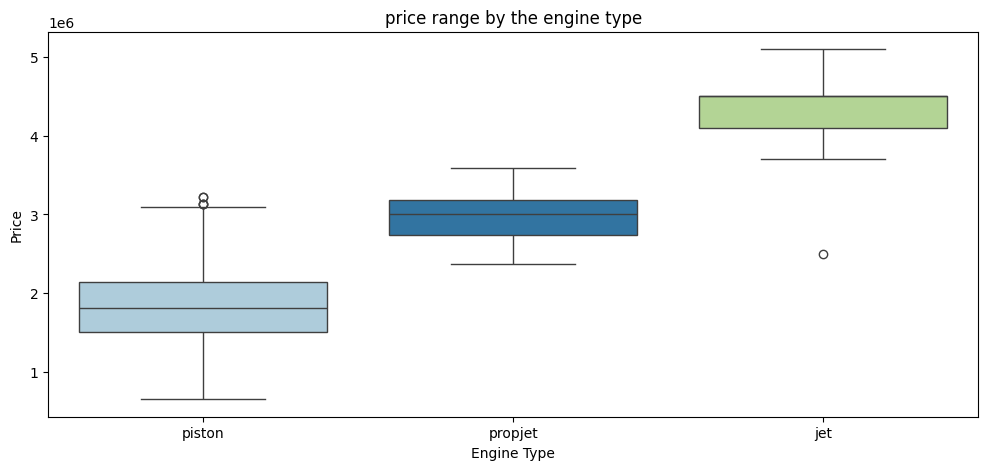

In [59]:
plt.figure(figsize=(12,5))
sns.boxplot(df,x='Engine Type',y='Price',hue='Engine Type',palette='Paired')
plt.title('price range by the engine type',size=12)


From the boxplot, we can observe the following insights regarding the price distribution based on engine types:

- **Piston Engine**: The planes with piston engines are the cheapest, with prices ranging from approximately $300,000 to $3,000,000.
- **Propjet Engine**: The planes with propjet engines have a minimum price of around $2,200,000 and can go up to $3,500,000.
- **Jet Engine**: The planes with jet engines are the most expensive, with the minimum price starting at the maximum price of propjet planes and reaching up to $5,000,000.

This analysis clearly indicates that the engine type has a significant influence on the plane's price.

In [60]:
from markdown import Markdown 
from IPython.display import display
from scipy import  stats

In [61]:
def reg_plot(col):
    plt.figure(figsize=(10, 6))
    sns.regplot(x=col, y='Price', data=df)
    plt.title(f'Relation between the price and {col}')
    pearson, p_value = stats.pearsonr(df[col], df['Price'])

    display(Markdown(f'**The Pearson coefficient of correlation:** {pearson}'))
    display(Markdown(f'**With a p-value of:** {p_value}'))
    plt.show()
   



In [62]:
df.columns[1:14]

Index(['HP or lbs thr ea engine', 'Max speed Knots', 'Rcmnd cruise Knots',
       'Stall Knots dirty', 'Fuel gal/lbs', 'All eng rate of climb',
       'Eng out rate of climb', 'Takeoff over 50ft', 'Landing over 50ft',
       'Empty weight lbs', 'Length ft/in', 'Wing span ft/in', 'Range N.M.'],
      dtype='object')

#### **The Pearson coefficient of correlation:** 0.653

#### **With a p-value of:** 1.4735013165003848e-52

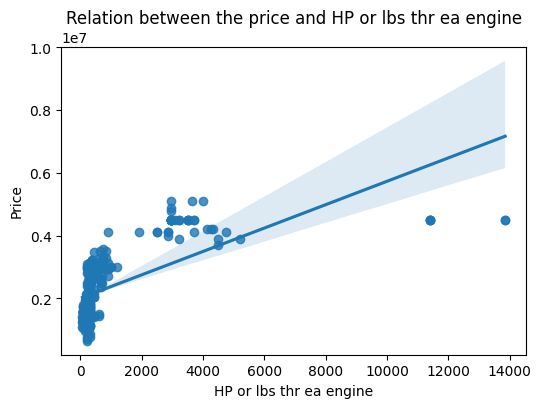

#### **The Pearson coefficient of correlation:** 0.895

#### **With a p-value of:** 5.983034452095195e-149

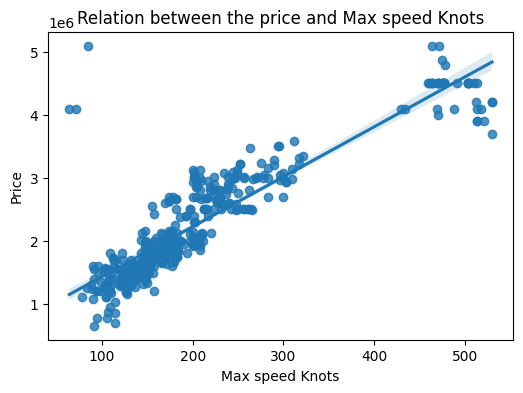

#### **The Pearson coefficient of correlation:** 0.948

#### **With a p-value of:** 7.027242409409066e-210

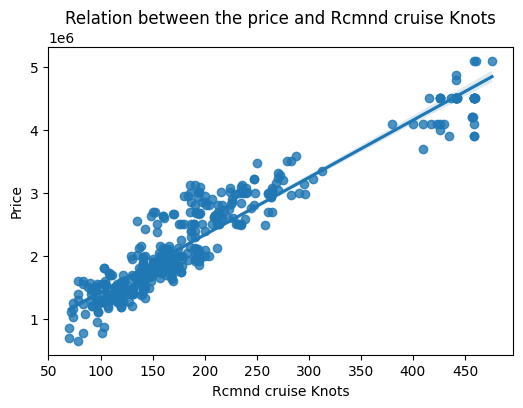

#### **The Pearson coefficient of correlation:** 0.85

#### **With a p-value of:** 1.2421194663943753e-118

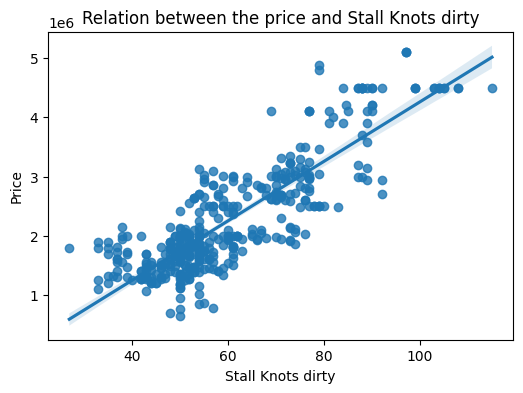

#### **The Pearson coefficient of correlation:** 0.586

#### **With a p-value of:** 3.4311596708764367e-40

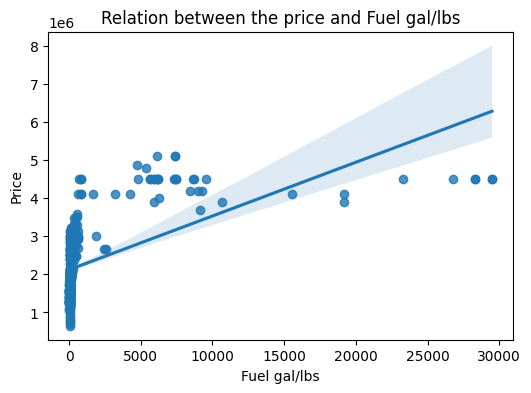

#### **The Pearson coefficient of correlation:** 0.869

#### **With a p-value of:** 4.91660570001409e-130

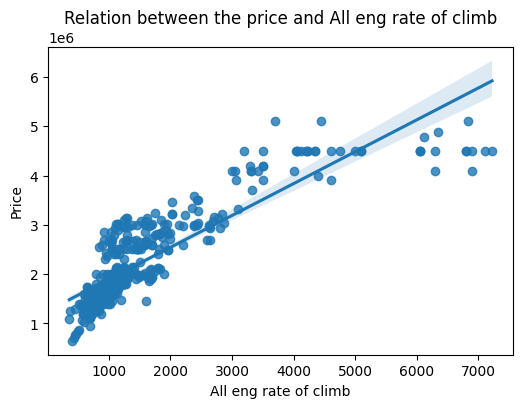

#### **The Pearson coefficient of correlation:** 0.777

#### **With a p-value of:** 2.1635002855396634e-86

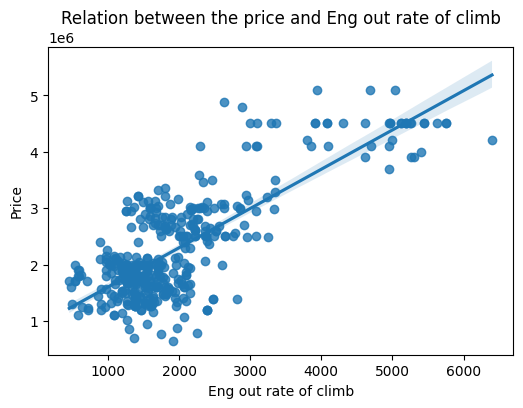

#### **The Pearson coefficient of correlation:** 0.807

#### **With a p-value of:** 9.580505772337584e-98

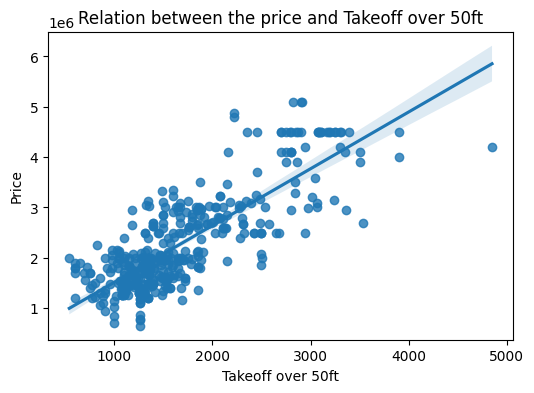

#### **The Pearson coefficient of correlation:** 0.675

#### **With a p-value of:** 2.704665202008112e-57

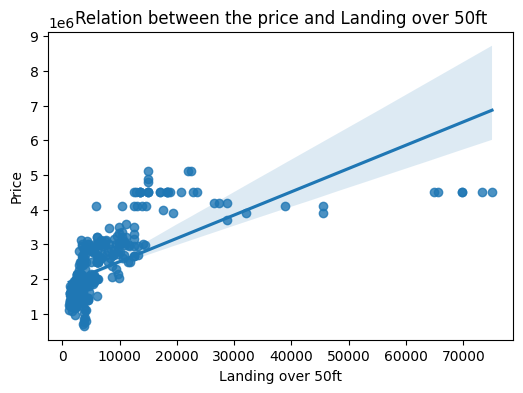

#### **The Pearson coefficient of correlation:** 0.675

#### **With a p-value of:** 2.7895014404080244e-57

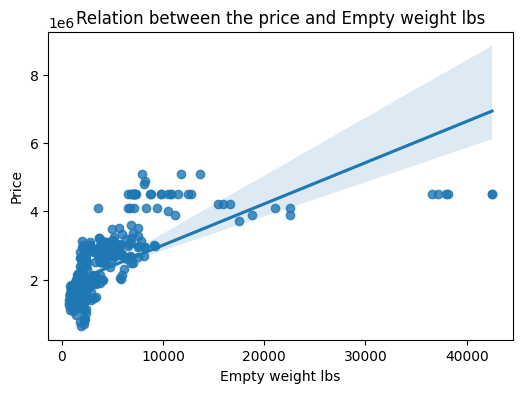

#### **The Pearson coefficient of correlation:** 0.807

#### **With a p-value of:** 4.477481329793207e-98

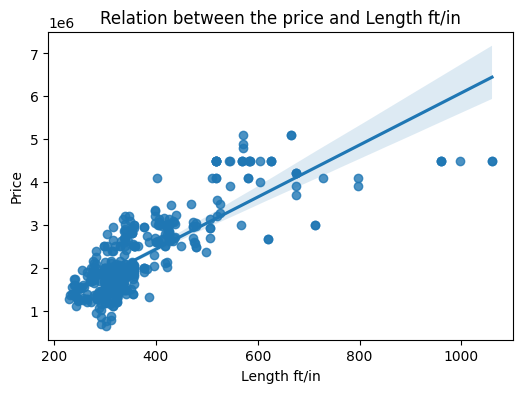

#### **The Pearson coefficient of correlation:** 0.564

#### **With a p-value of:** 1.0154295425324378e-36

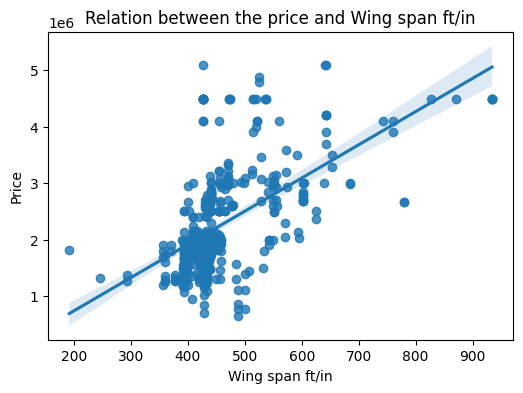

#### **The Pearson coefficient of correlation:** 0.743

#### **With a p-value of:** 5.203417946724219e-75

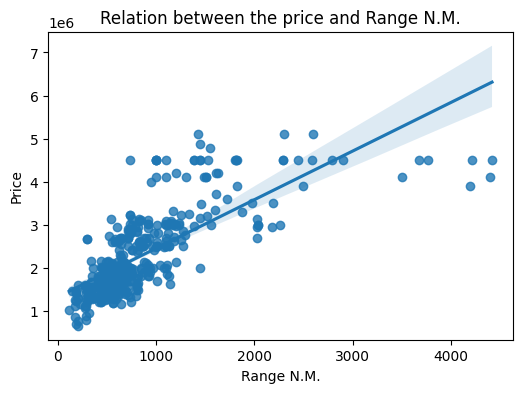

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display, Markdown

def reg_plot(col):
    
    plt.figure(figsize=(6, 4))
    sns.regplot(x=col, y='Price', data=df)
    plt.title(f'Relation between the price and {col}')
    
    pearson, p_value = stats.pearsonr(df[col], df['Price'])
    
    display(Markdown(f"#### **The Pearson coefficient of correlation:** {round(pearson,3)}"))
    display(Markdown(f"#### **With a p-value of:** {p_value}"))
    
    plt.show()

for col in df.columns[1:14]:
    reg_plot(col)

**Interpretation of Regression Analysis:**

Based on the regression plots and correlation coefficients, we can observe several key relationships between plane features and price:

Strong Positive Correlations (r > 0.7):
- **Speed**: Shows one of the strongest correlations, indicating faster planes command significantly higher prices
- **Wing Span**: Larger wing spans are associated with higher prices, likely due to increased manufacturing costs and aircraft size
- **Take Off Over 50ft**: Planes requiring longer takeoff distances tend to be larger and more expensive
- **Climbing Rate**: Better climbing performance correlates with higher prices, reflecting more powerful engines

Moderate Positive Correlations (0.4 < r < 0.7):
- **Length**: Longer planes generally cost more, though the relationship is not as strong as speed or wing span
- **Max Weight**: Heavier maximum weights indicate larger planes that command higher prices
- **Seats**: More seating capacity shows a positive but moderate correlation with price

Weak Correlations (r < 0.4):
- Some technical specifications show weaker price relationships, suggesting they are not primary price drivers

All correlations show statistical significance (p-value < 0.05), confirming these relationships are not due to random chance. The analysis reveals that performance metrics (speed, climbing rate) and size indicators (wing span, length) are the strongest price determinants.

### **regression analysis**

In [64]:
x = df[df.columns[1:14]]
y = df['Price']

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression()
lr.fit(x,y)

feature_importance = pd.DataFrame({
    'columns' : x.columns ,
    'importance' : lr.coef_
}).sort_values(by='importance',ascending=False)

In [67]:
feature_importance

,columns,importance
2,Rcmnd cruise Knots,9353.217292
11,Wing span ft/in,2014.699337
3,Stall Knots dirty,1164.892922
1,Max speed Knots,690.141120
10,Length ft/in,539.231036
0,HP or lbs thr ea engine,82.584836
7,Takeoff over 50ft,72.480987
12,Range N.M.,46.129073
9,Empty weight lbs,28.332871
4,Fuel gal/lbs,20.800886


In [68]:
feature_importance.style.background_gradient(cmap='magma')

,columns,importance
2,Rcmnd cruise Knots,9353.217292
11,Wing span ft/in,2014.699337
3,Stall Knots dirty,1164.892922
1,Max speed Knots,690.141120
10,Length ft/in,539.231036
0,HP or lbs thr ea engine,82.584836
7,Takeoff over 50ft,72.480987
12,Range N.M.,46.129073
9,Empty weight lbs,28.332871
4,Fuel gal/lbs,20.800886


<Axes: xlabel='importance', ylabel='columns'>

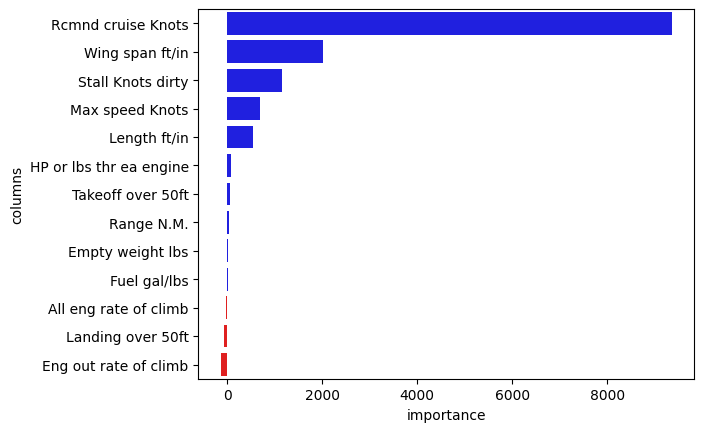

In [69]:
c = ['red' if x < 0 else 'blue' for x in feature_importance['importance']]
sns.barplot(feature_importance,y='columns',x='importance',palette=c,orient='h')

In [70]:
from sklearn.preprocessing import OrdinalEncoder

In [71]:
orders = [['piston', 'propjet', 'jet']]
Ord_encoder = OrdinalEncoder(categories=orders)
df['Engine Type'] = Ord_encoder.fit_transform(df[['Engine Type']])

In [72]:
df.head()

,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,0.0,145.0,104.0,91.0,46.0,36,450.0,900.0,1300.0,2050.0,1180.0,303,449,370.0,1300000.0
1,0.0,85.0,89.0,83.0,44.0,15,600.0,720.0,800.0,1350.0,820.0,247,433,190.0,1230000.0
2,0.0,90.0,90.0,78.0,37.0,19,650.0,475.0,850.0,1300.0,810.0,257,420,210.0,1600000.0
3,0.0,85.0,88.0,78.0,37.0,19,620.0,500.0,850.0,1300.0,800.0,257,420,210.0,1300000.0
4,0.0,65.0,83.0,74.0,33.0,14,370.0,632.0,885.0,1220.0,740.0,257,420,175.0,1250000.0


### **correlation**

In [73]:
corr_price = df.corrwith(df['Price'])

corr_price = pd.DataFrame({

    'correlation':corr_price}).sort_values(by='correlation',ascending = False)
corr_price    


,correlation
Price,1.000000
Rcmnd cruise Knots,0.947669
Max speed Knots,0.894951
All eng rate of climb,0.868892
Stall Knots dirty,0.849875
Engine Type,0.837009
Length ft/in,0.807448
Takeoff over 50ft,0.806665
Eng out rate of climb,0.777402
Range N.M.,0.742786


In [74]:
corr_price.style.background_gradient('magma')

,correlation
Price,1.000000
Rcmnd cruise Knots,0.947669
Max speed Knots,0.894951
All eng rate of climb,0.868892
Stall Knots dirty,0.849875
Engine Type,0.837009
Length ft/in,0.807448
Takeoff over 50ft,0.806665
Eng out rate of climb,0.777402
Range N.M.,0.742786


Text(0.5, 1.0, 'correlation of price with data features')

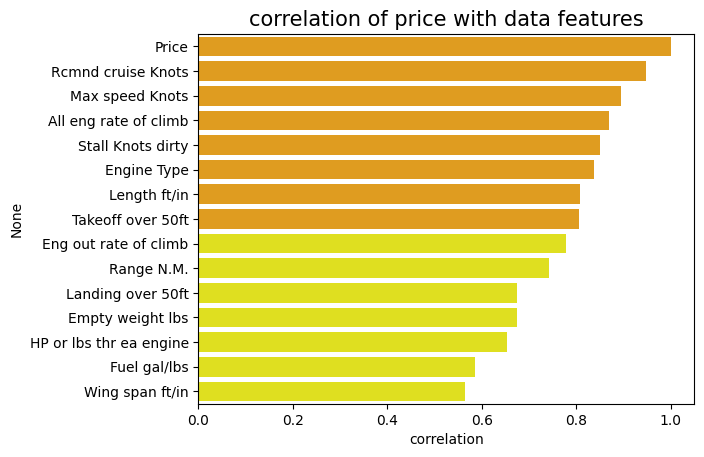

In [75]:
c = ['yellow' if x <= 0.8 else 'orange' for x in corr_price['correlation']]
sns.barplot(corr_price,y=corr_price.index,x='correlation',palette=c)
plt.title('correlation of price with data features',size=15,color='black')

<Axes: >

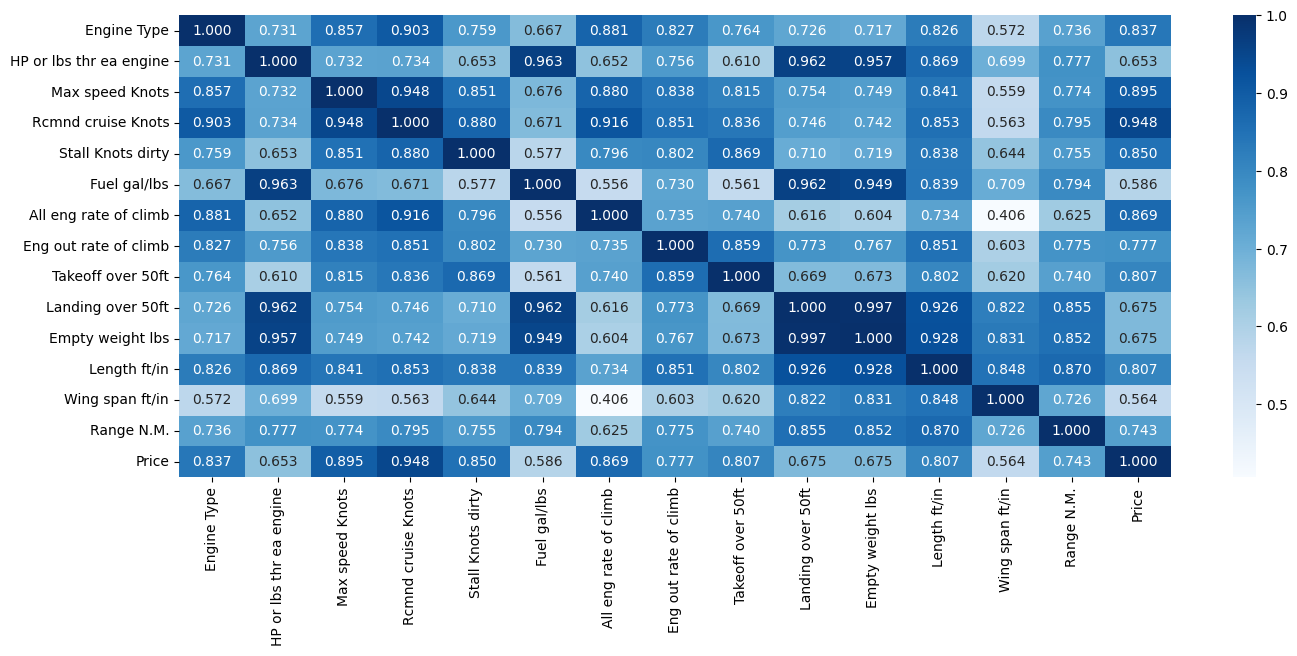

In [76]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.3f')

###  **data preparation and model building**

In [77]:
from sklearn.preprocessing import StandardScaler,minmax_scale
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import  mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,make_scorer,r2_score
from xgboost import XGBRegressor



1. **Scaling the data**

In [78]:
Scaler = StandardScaler()
df[df.columns[1:]] = Scaler.fit_transform(df[df.columns[1:]])

In [79]:
df.head()

,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,0.0,-0.359834,-0.962564,-1.045548,-0.910775,-0.280355,-0.897625,-1.015012,-0.560205,-0.494913,-0.527116,-0.568558,-0.145716,-0.771530,-1.032559
1,0.0,-0.395808,-1.102273,-1.126372,-1.035116,-0.285673,-0.780268,-1.184347,-1.294731,-0.568146,-0.594770,-1.011515,-0.321117,-1.059207,-1.106135
2,0.0,-0.392810,-1.092959,-1.176886,-1.470309,-0.284660,-0.741149,-1.414831,-1.221279,-0.573377,-0.596650,-0.932416,-0.463630,-1.027243,-0.717234
3,0.0,-0.395808,-1.111587,-1.176886,-1.470309,-0.284660,-0.764620,-1.391313,-1.221279,-0.573377,-0.598529,-0.932416,-0.463630,-1.027243,-1.032559
4,0.0,-0.407799,-1.158157,-1.217298,-1.718991,-0.285926,-0.960215,-1.267134,-1.169862,-0.581747,-0.609804,-0.932416,-0.463630,-1.083180,-1.085113


2. **spliting the data into 2 subsets X and Y and then into 4 sets training and testing** 

In [80]:
X,Y = df.iloc[:,:14],df['Price']

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Results for Random_forest:
R score : 0.9590

Mean Absolute Error: 145061.1294

Mean Squared Error: 35132473528.1176



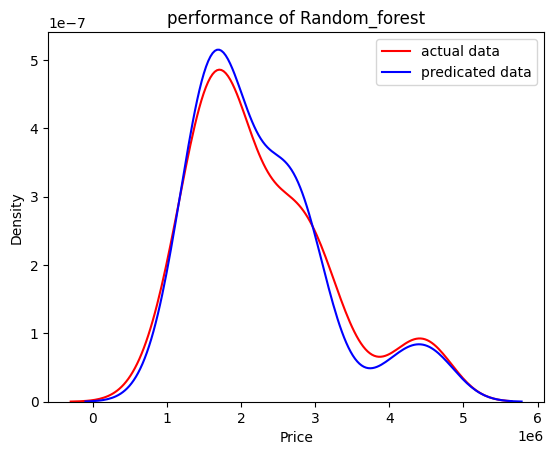

Results for xgboost:
R score : 0.9561

Mean Absolute Error: 141100.9228

Mean Squared Error: 37632220226.1335



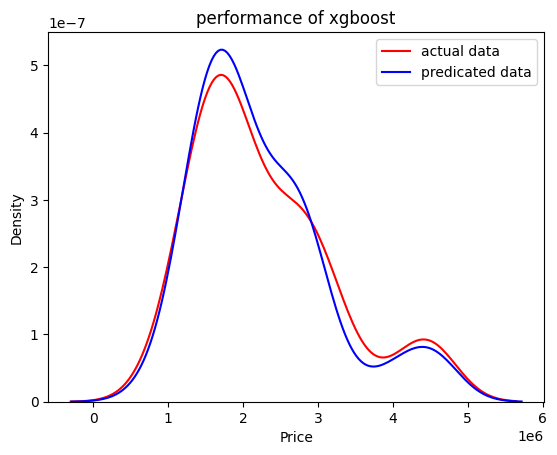

In [83]:
models = {'Random_forest': RandomForestRegressor(), 'xgboost': XGBRegressor()}
predictions = {}

def train_and_evaluate(model, model_name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    predictions[model_name] = y_pred
    print(f"Results for {model_name}:")
    print(f"R score : {r2_score(y_test, y_pred):.4f}\n")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}\n")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}\n")
    ax = sns.kdeplot(x=y_test,color='red',label='actual data')
    sns.kdeplot(x=y_pred,color='blue',label='predicated data',ax=ax)
    plt.title(f'performance of {model_name}')
    plt.legend()
    plt.show()

for name, model in models.items():
    train_and_evaluate(model, name)

### **Model Evaluation**

In the machine learning part of the project, we used two models: **Random Forest** and **XGBoost Regressor**. Here's why these models were chosen:

#### **1. Random Forest**
- Random Forest is an ensemble learning method that constructs multiple decision trees during the training process and outputs either the mode (classification) or the average (regression) of the individual trees.
- It is robust against overfitting and performs well on a variety of datasets, making it a reliable choice for our regression task.

#### **2. XGBoost (Extreme Gradient Boosting)**
- XGBoost is another ensemble technique that focuses on boosting. It builds decision trees sequentially, with each tree correcting the errors of the previous one.
- It is particularly effective for improving accuracy and handling complex datasets.

---

#### **Performance Metrics**

#### **Density Plot**
We plotted the density distribution of predicted values versus actual values to visualize how well the models predicted house prices. The plots showed a good alignment between predicted and actual values, indicating that our models performed well.

#### **Mean Absolute Error (MAE)**
The average error between predicted and actual prices was **$145,061**, meaning that, on average, our model's predictions deviated from the true prices by this amount.

#### **R² Score**
Both models achieved an **R² score of 0.95**, which indicates that they explained 95% of the variance in the dataset. This high score demonstrates that the models are highly effective at capturing the underlying patterns in the data.

---

#### **Conclusion**
Both Random Forest and XGBoost proved to be robust and accurate for predicting house prices, with minimal error and strong explanatory power. These results highlight their suitability for regression tasks in this domain.


In [225]:
models['Random_forest']

RandomForestRegressor()

In [231]:
first_tree = models['Random_forest'].estimators_[0]

In [232]:
from sklearn.tree import plot_tree

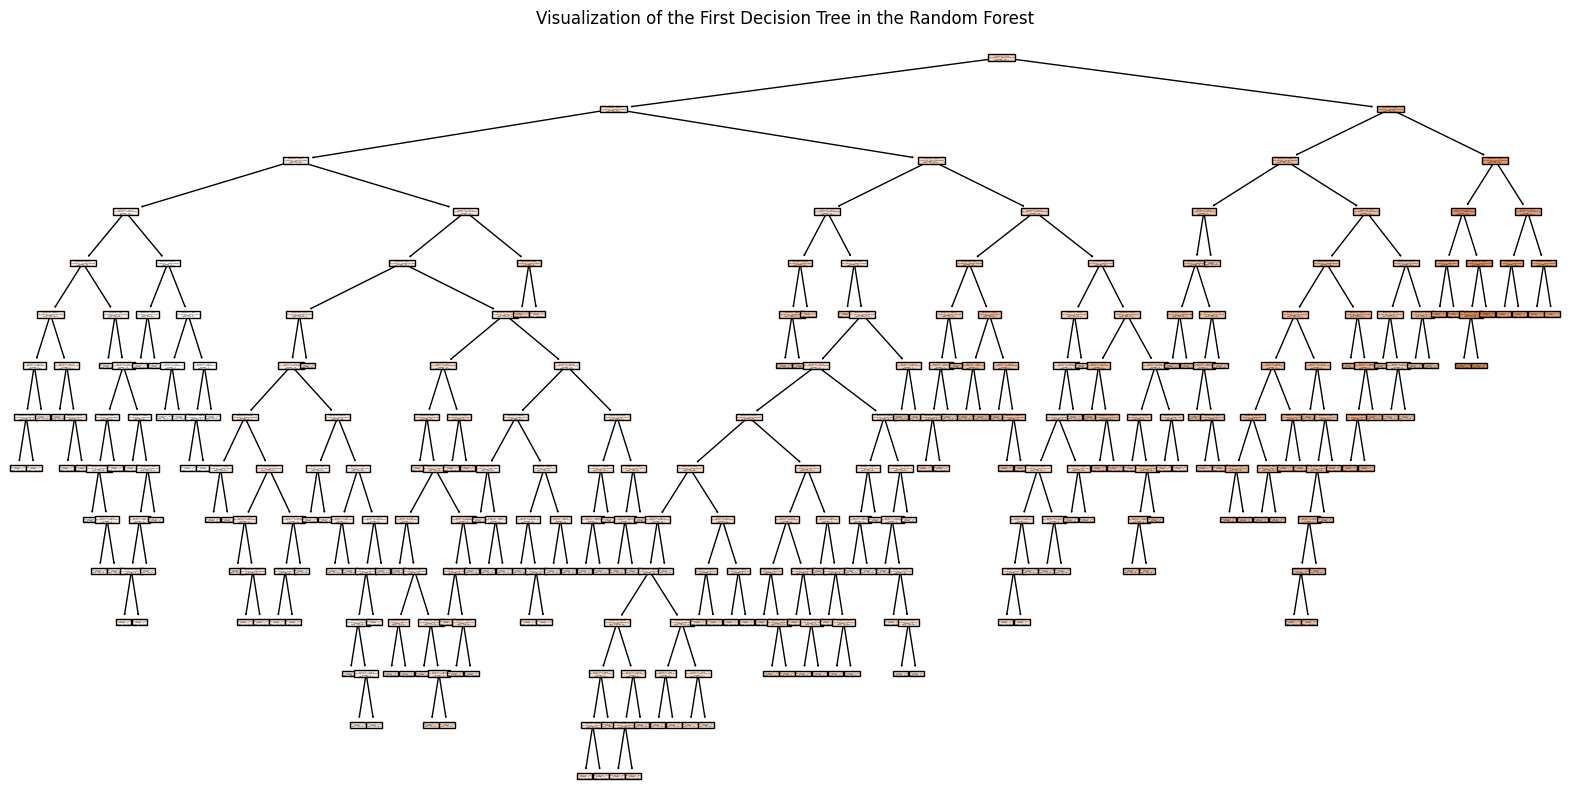

In [243]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

first_tree = models['Random_forest'].estimators_[1]

plt.figure(figsize=(20, 10))
plot_tree(first_tree, feature_names=[f'Feature {i}' for i in range(X.shape[1])], filled=True)
plt.title("Visualization of the First Decision Tree in the Random Forest")
plt.show()


In [84]:
!jupyter nbconvert --to html model.ipynb

[NbConvertApp] Converting notebook model.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 22 image(s).
[NbConvertApp] Writing 2186237 bytes to model.html
